In [28]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train = datasets.MNIST("", download = True, train = True, transform = transforms.Compose([transforms.ToTensor()]))

In [6]:
test = datasets.MNIST("", download = True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [11]:
batch = 0
for data in trainset:
    batch = data
    break
batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [20]:
batch[0][0].shape

torch.Size([1, 28, 28])

tensor(5)


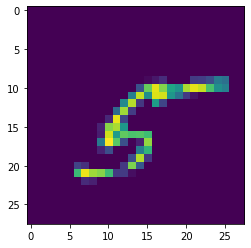

In [15]:
plt.imshow(batch[0][0].view([28,28]))
print(batch[1][0])

In [35]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.log_softmax(self.fc4(X), dim = 1)
        
        return X
    
net = NN()

In [36]:
optimizer = optim.Adam(net.parameters(), lr = 1e-3)
EPOCHS = 3
IMG_SIZE = 28

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        out = net(X.view(-1, IMG_SIZE*IMG_SIZE))
        loss = F.nll_loss(out, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0304, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.2433, grad_fn=<NllLossBackward>)


In [37]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for index, i in enumerate(output):
            if torch.argmax(i) == y[index]:
                correct+=1
            total+=1
print("Accuracy: ", correct/total)

Accuracy:  0.97365


In [42]:
def prediction(img):
    img = img.view(28,28)
    plt.imshow(img)
    print("Prediction:", int(torch.argmax(net(img.view(-1,784)))))

Prediction: 5


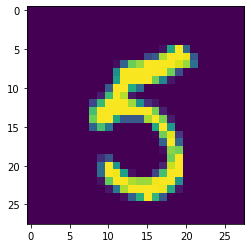

In [46]:
n = 1
prediction(X[n])